# Automated EDA for Racing Data

This notebook performs automated exploratory data analysis on the racing CSV files in the `data/` directory.

In [3]:
# Imports and setup for Auto-EDA
import os
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Try preferred profiling packages (ydata_profiling or pandas_profiling)
profile_pkg = None
try:
    import ydata_profiling as ydp
    profile_pkg = 'ydata_profiling'
except Exception:
    try:
        import pandas_profiling as pdp
        profile_pkg = 'pandas_profiling'
    except Exception:
        profile_pkg = None

print('Profiling package available:', profile_pkg)

c:\Users\josek\Desktop\ProyectosPersonales\TGR-C-1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Profiling package available: None


In [6]:
# Set up path to the specific telemetry data file
repo_root = Path('..').resolve()  # notebook is in src/, repo root is parent
data_file = repo_root / 'data' / 'barber-motorsports-park' / 'barber' / 'R1_barber_telemetry_data.csv'
print('Target file:', data_file.relative_to(repo_root))

if not data_file.exists():
    raise FileNotFoundError(f'Telemetry data file not found: {data_file}')

Target file: data\barber-motorsports-park\barber\R1_barber_telemetry_data.csv


Reading telemetry data...
Data shape: (11556519, 13)
Data shape: (11556519, 13)

Found 12 telemetry measurements across 20 vehicles

Telemetry measurements: ['Laptrigger_lapdist_dls', 'Steering_Angle', 'VBOX_Lat_Min', 'VBOX_Long_Minutes', 'accx_can', 'accy_can', 'aps', 'gear', 'nmot', 'pbrake_f', 'pbrake_r', 'speed']

Vehicles: ['GR86-002-000', 'GR86-004-78', 'GR86-006-7', 'GR86-010-16', 'GR86-013-80', 'GR86-015-31', 'GR86-016-55', 'GR86-022-13', 'GR86-025-47', 'GR86-026-72', 'GR86-030-18', 'GR86-033-46', 'GR86-036-98', 'GR86-038-93', 'GR86-040-3', 'GR86-047-21', 'GR86-049-88', 'GR86-060-2', 'GR86-063-113', 'GR86-065-5']

Basic statistics per telemetry measurement:

Found 12 telemetry measurements across 20 vehicles

Telemetry measurements: ['Laptrigger_lapdist_dls', 'Steering_Angle', 'VBOX_Lat_Min', 'VBOX_Long_Minutes', 'accx_can', 'accy_can', 'aps', 'gear', 'nmot', 'pbrake_f', 'pbrake_r', 'speed']

Vehicles: ['GR86-002-000', 'GR86-004-78', 'GR86-006-7', 'GR86-010-16', 'GR86-013-80', 

count         mean          std         min  \
telemetry_name                                                            
Laptrigger_lapdist_dls   240766.0  1832.950250  1087.946936    0.000000   
Steering_Angle          1203803.0    -7.447819    39.771328 -461.400000   
VBOX_Lat_Min            1203803.0    33.532515     0.001788   33.529285   
VBOX_Long_Minutes       1203803.0   -86.619125     0.002646  -86.624367   
accx_can                1203803.0     0.024704     0.341777   -3.895000   
accy_can                1203803.0    -0.183708     0.799264   -2.403000   
aps                     1203803.0    67.052922    42.944415    0.000000   
gear                    1203803.0     2.827948     0.960583   -1.000000   
nmot                     240766.0  6158.485322   822.055786    0.000000   
pbrake_f                1203803.0     5.442607    16.543434    0.000000   
pbrake_r                1203803.0     5.520300    16.718756    0.000000   
speed                    240760.0   128.876496    30.726208    0.000000   

                                25%          50%          75%          max  
telemetry_name                                                              
Laptrigger_lapdist_dls   910.000000  1803.000000  2828.000000  7384.000000  
Steering_Angle           -30.700000    -2.400000    10.700000   459.500000  
VBOX_Lat_Min              33.531189    33.532318    33.534035    33.535931  
VBOX_Long_Minutes        -86.620987   -86.618599   -86.617210   -86.614487  
accx_can                  -0.029000     0.141000     0.204000     1.746000  
accy_can                  -0.911000    -0.069000     0.279000     2.860000  
aps                       15.230000   100.000000   100.000000   100.000000  
gear                       2.000000     3.000000     4.000000     5.000000  
nmot                    5791.000000  6328.000000  6687.000000  7514.000000  
pbrake_f                   0.000000     0.000000     0.000000   178.055000  
pbrake_r                   0.000000     0.000000     0.000000   180.085000  
speed                    104.320000   132.440000   153.310000   189.120000

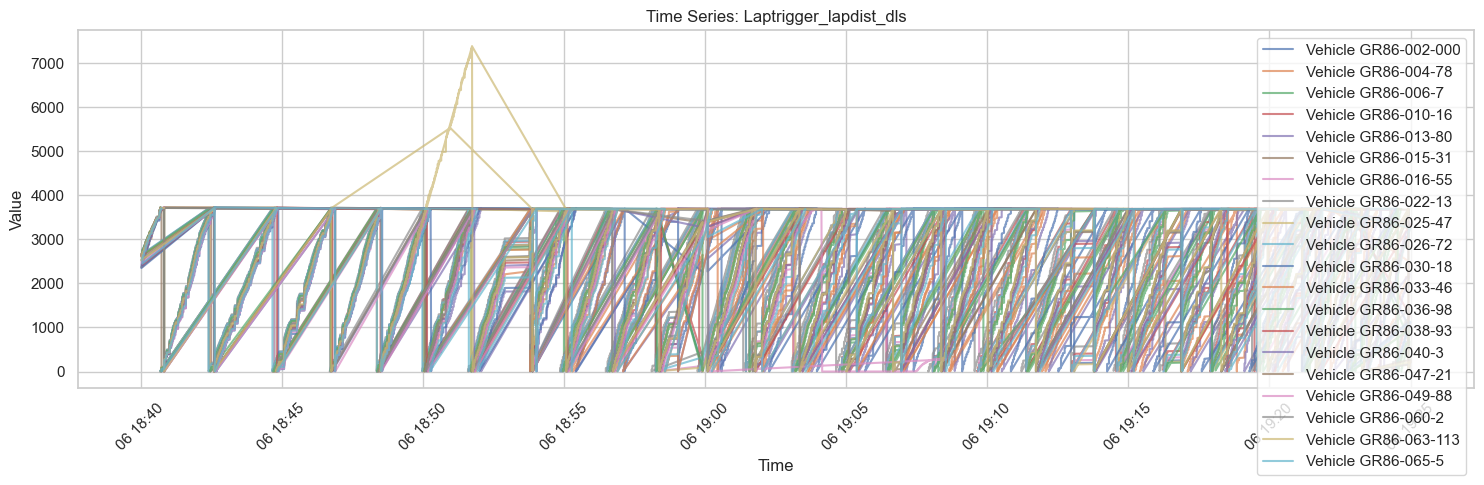

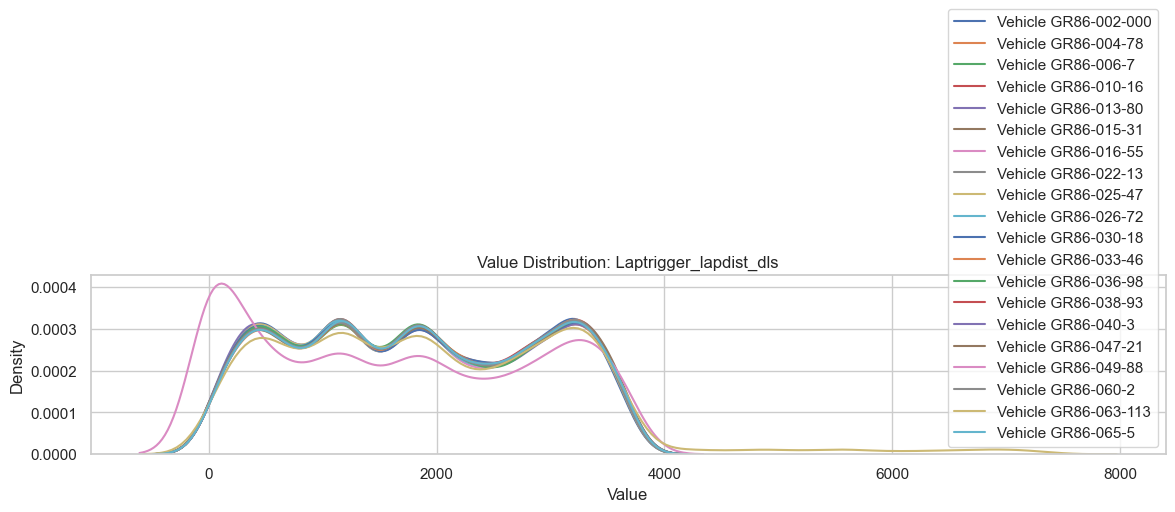

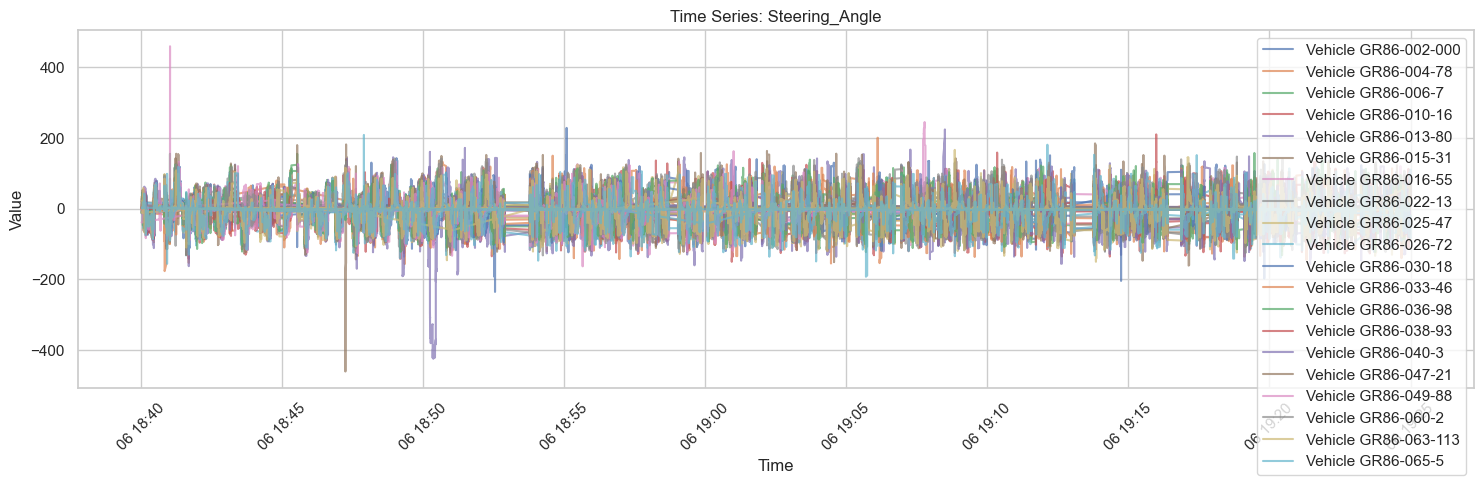

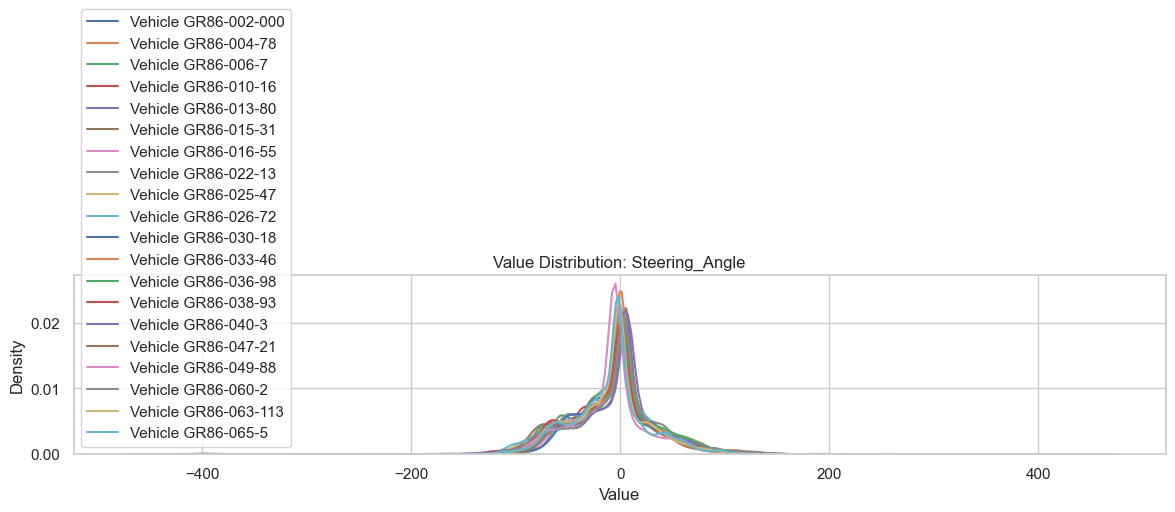

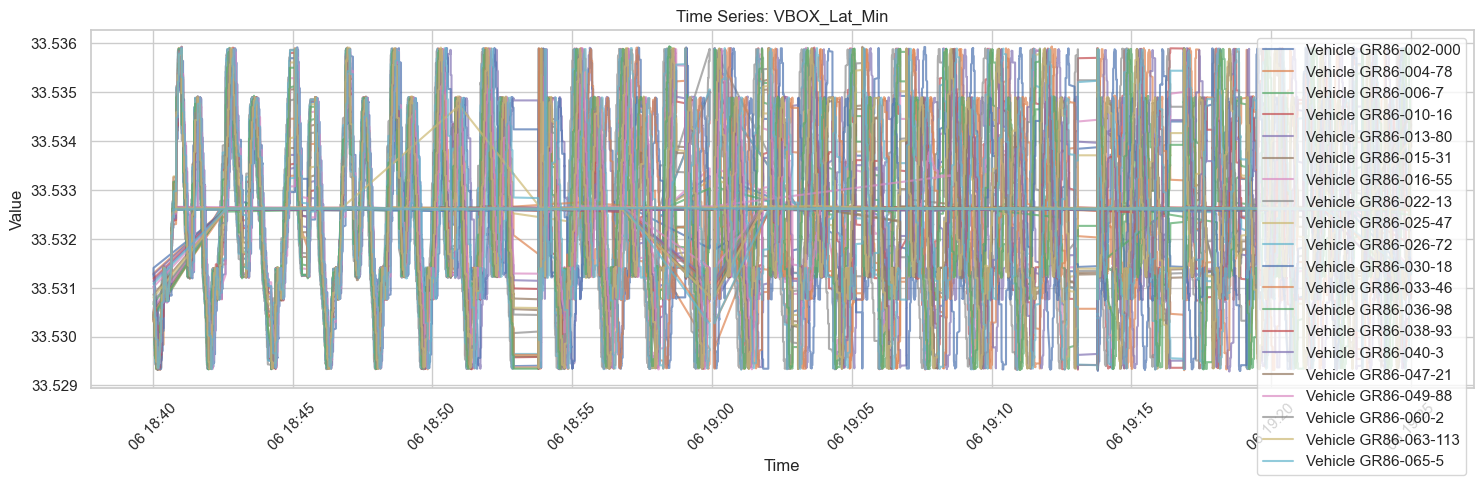

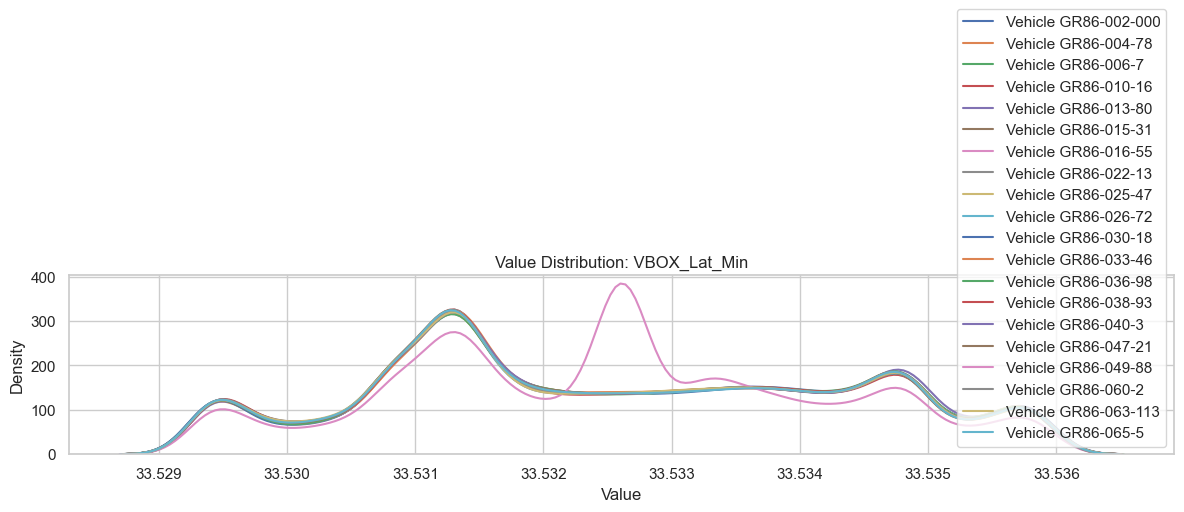

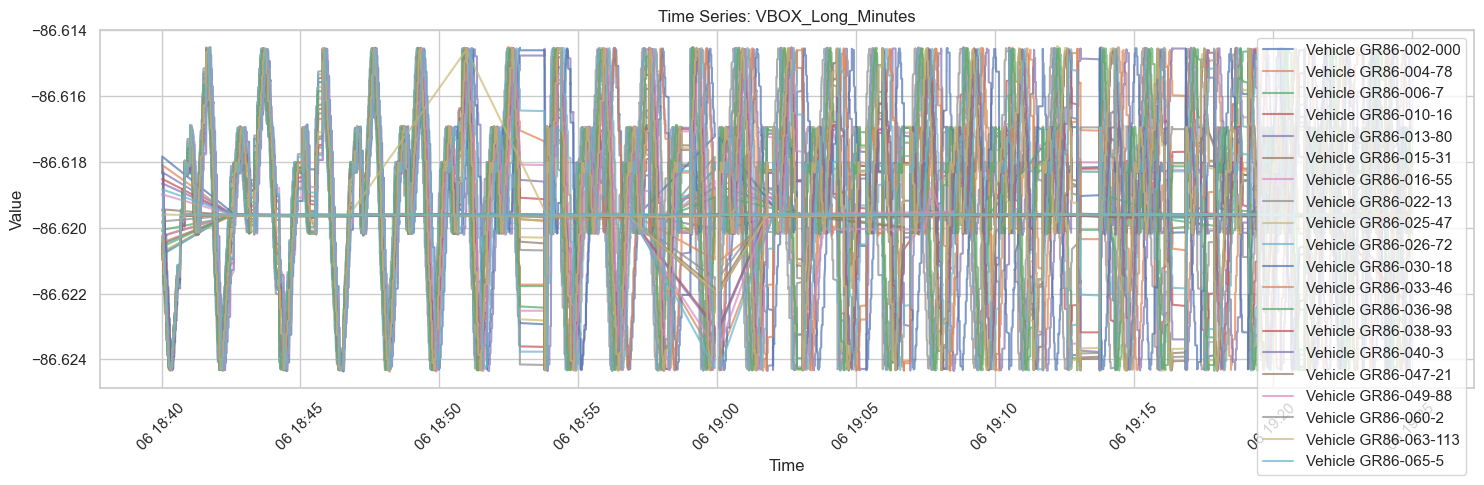

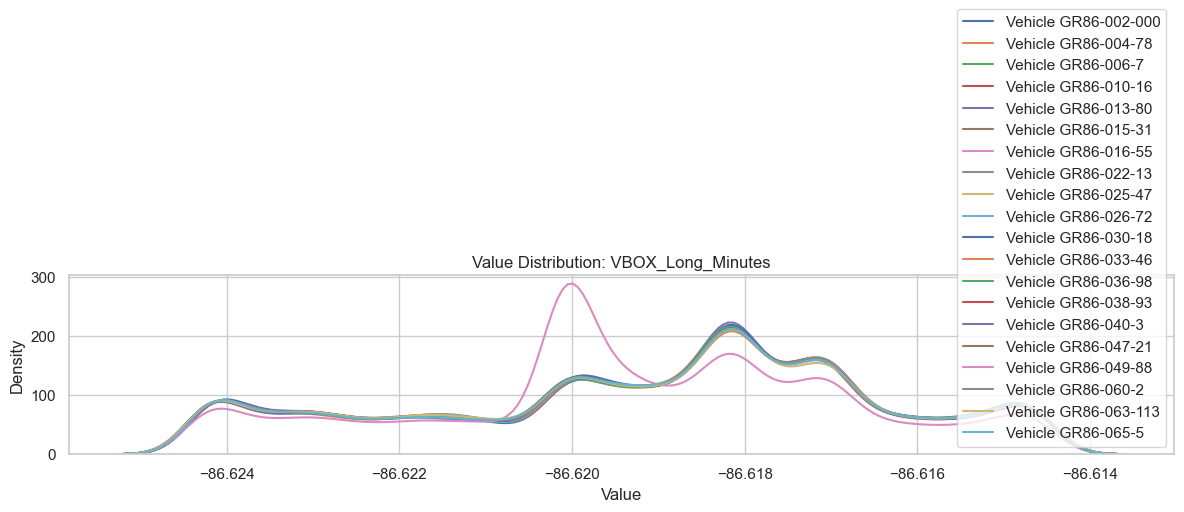

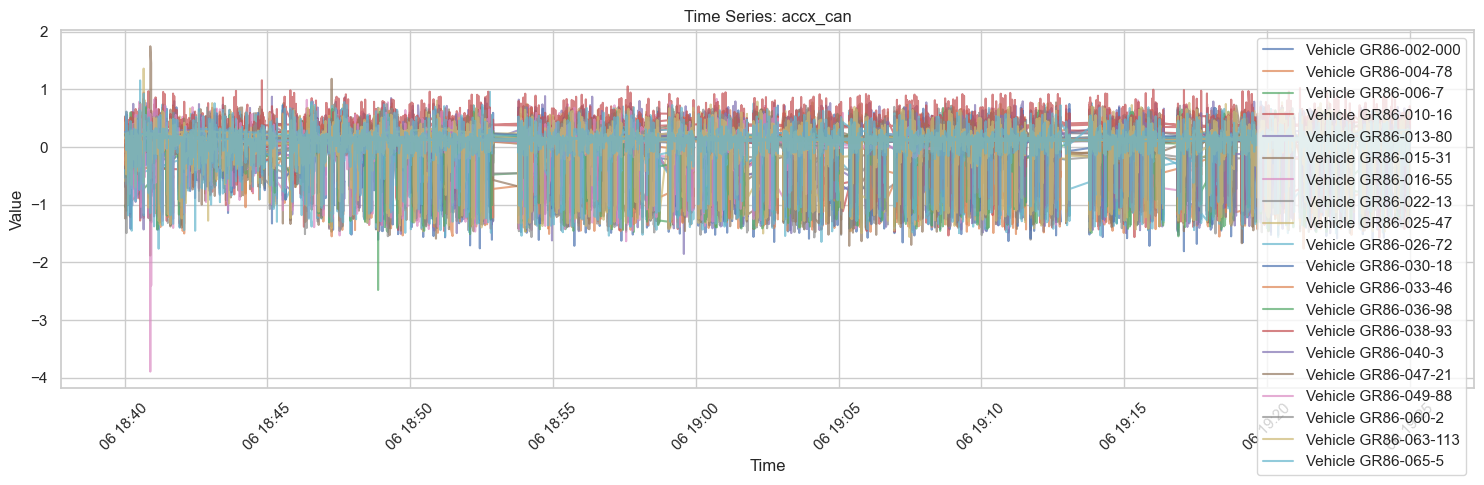

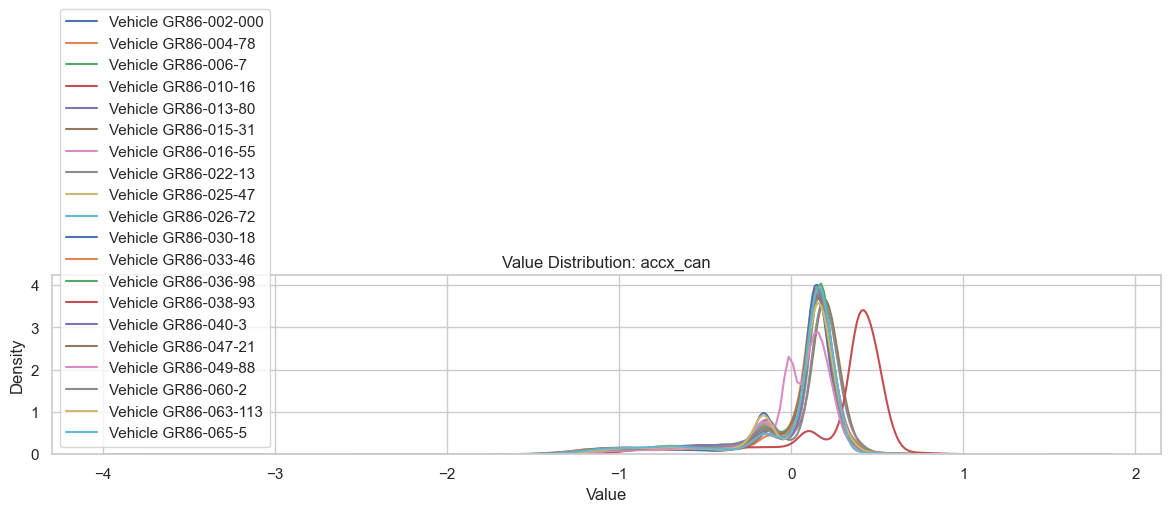

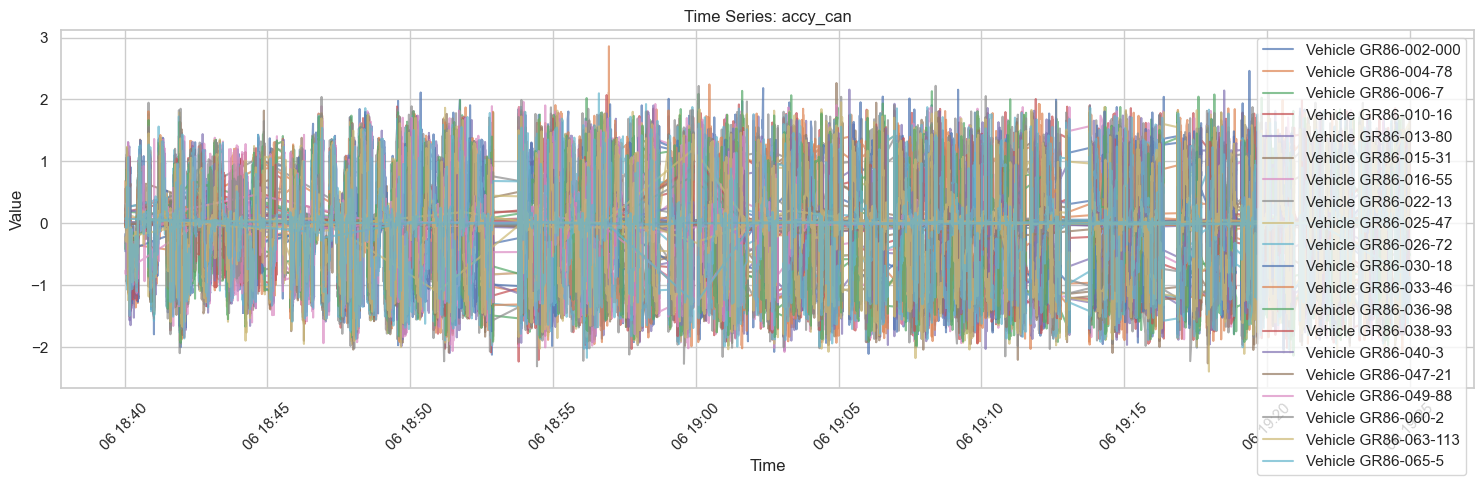

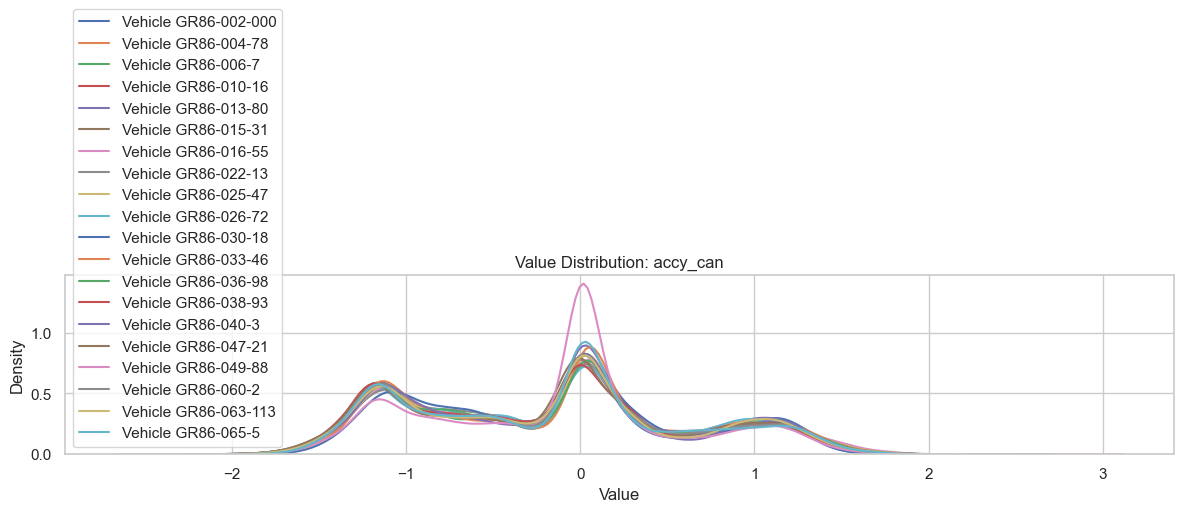

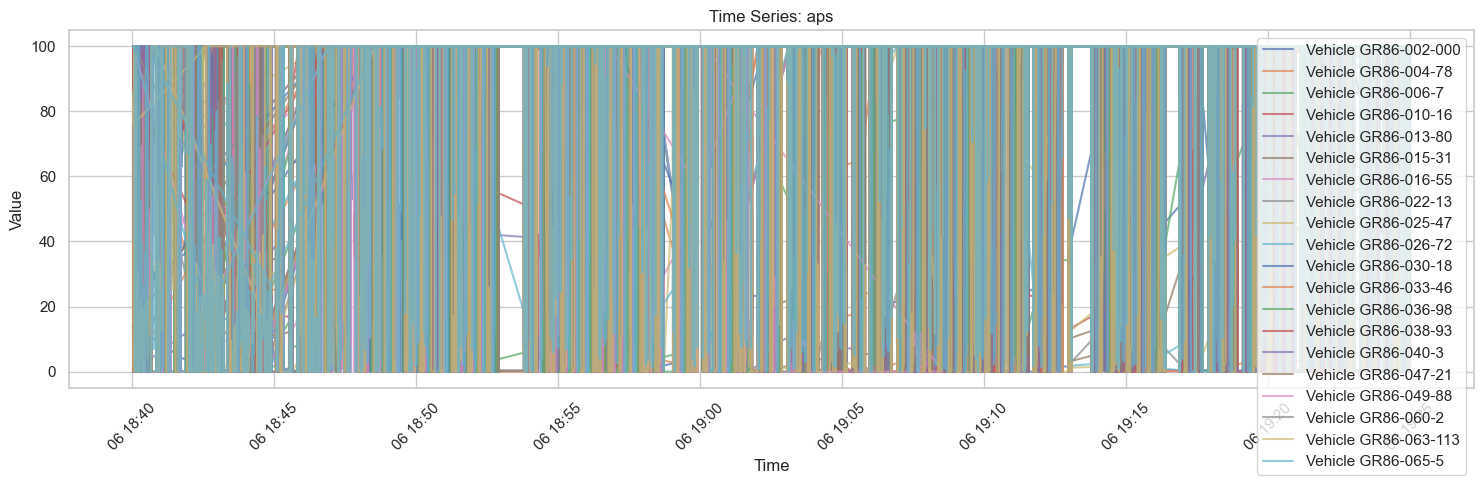

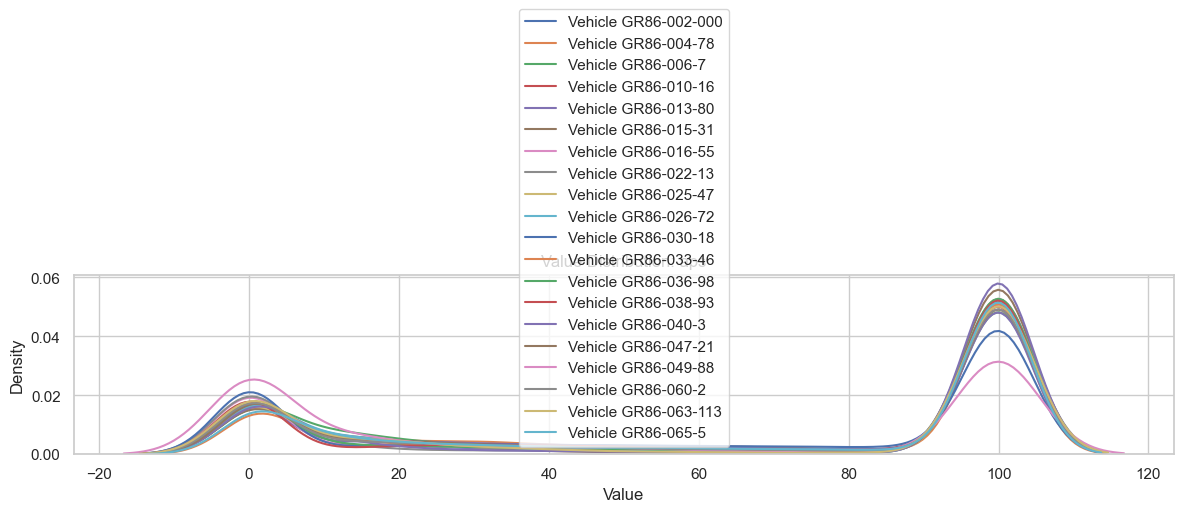

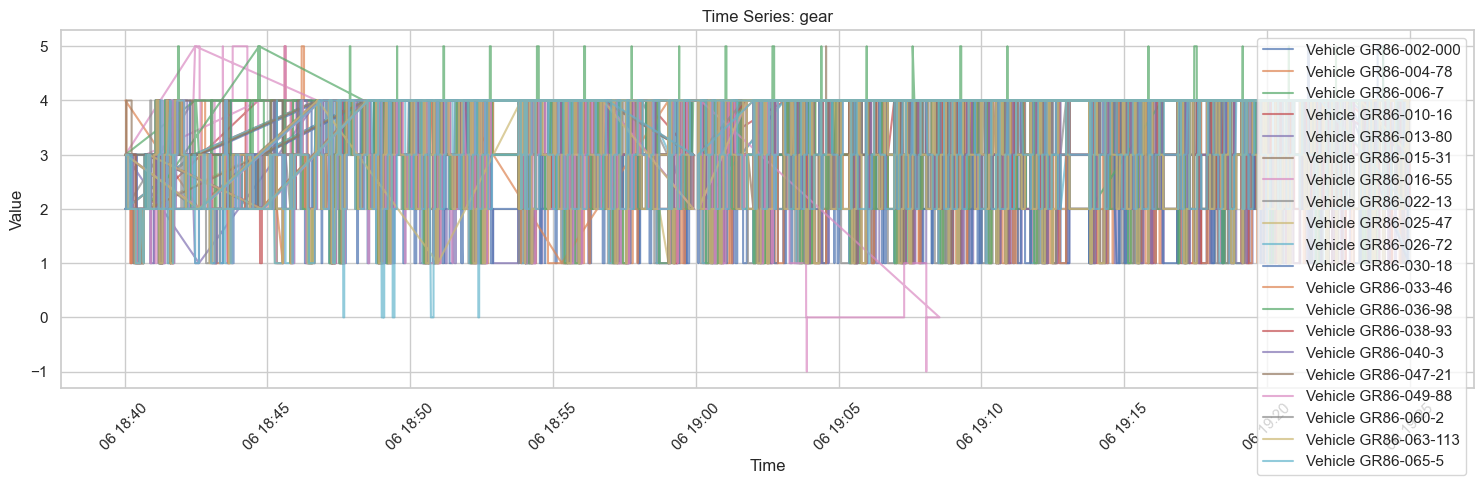

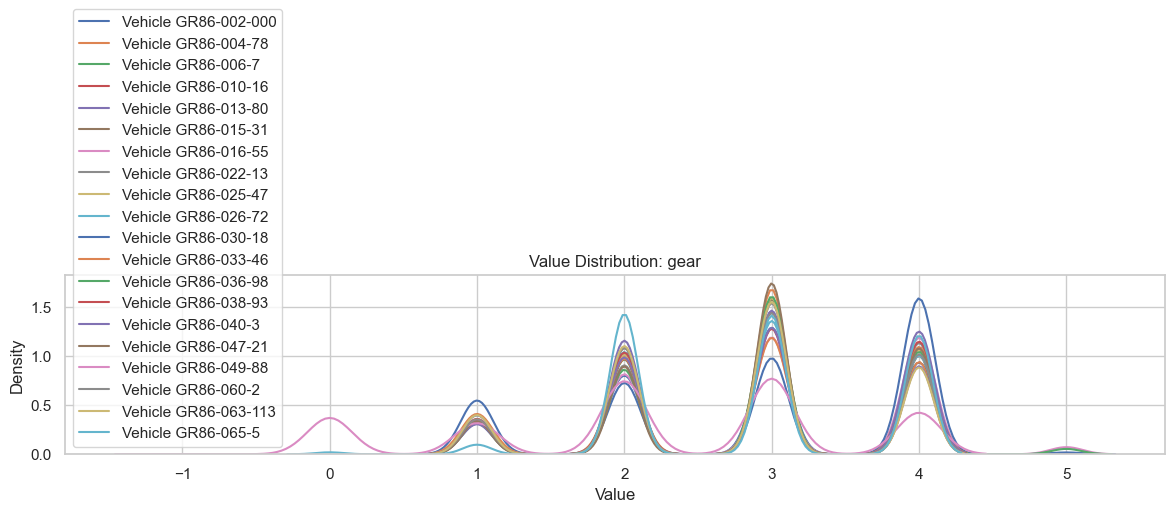

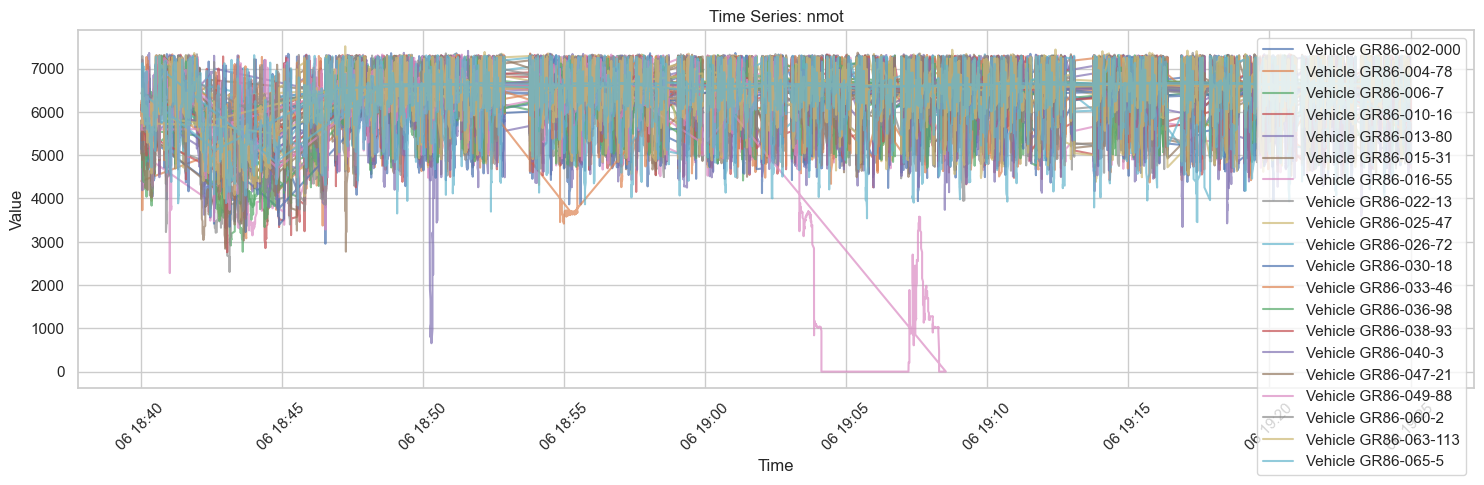

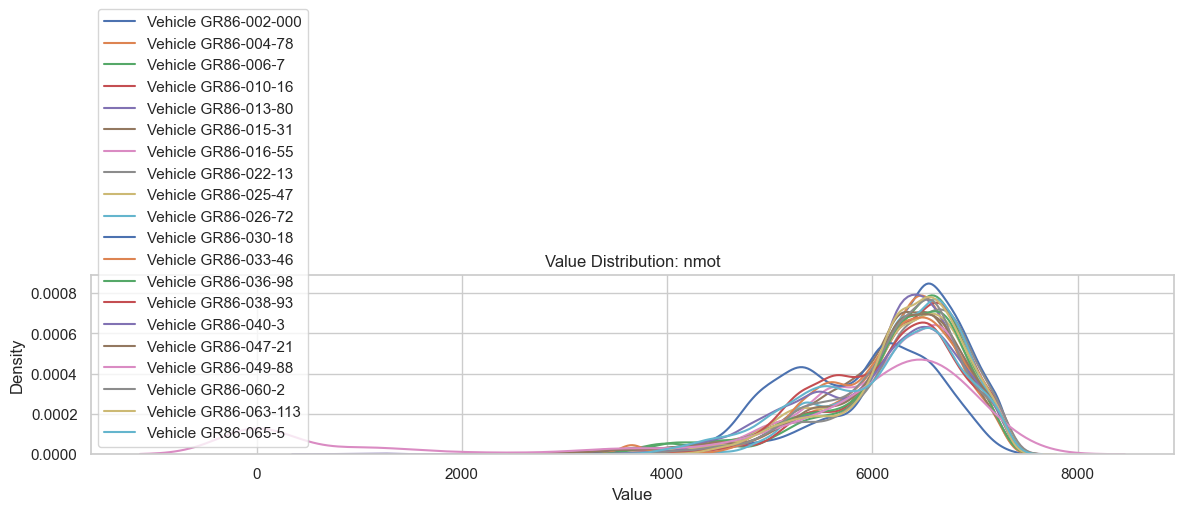

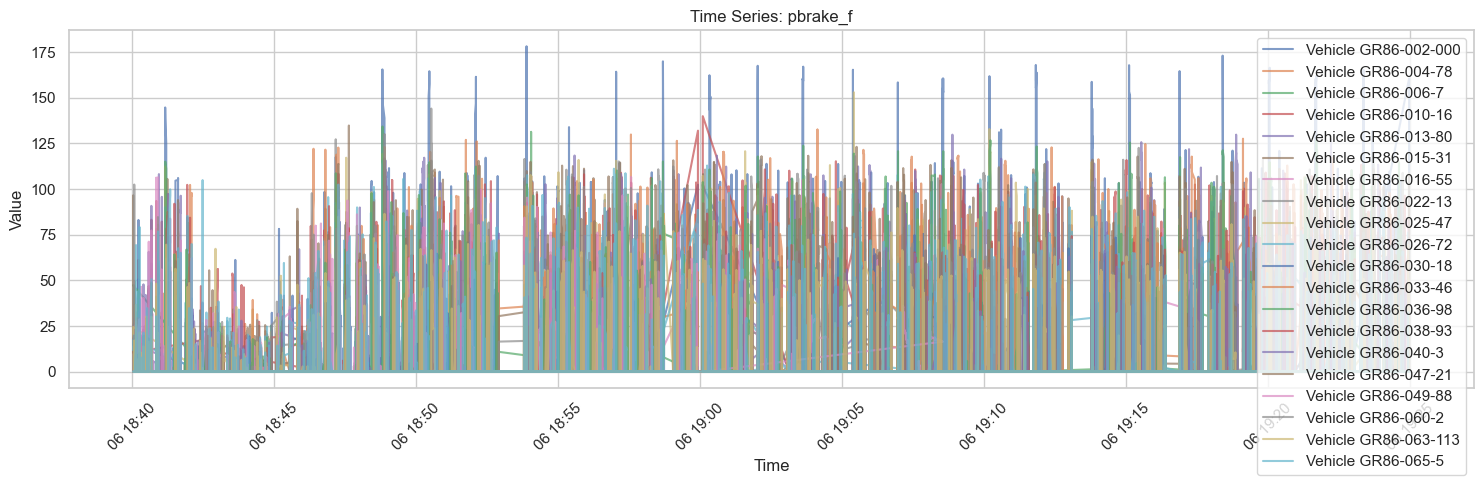

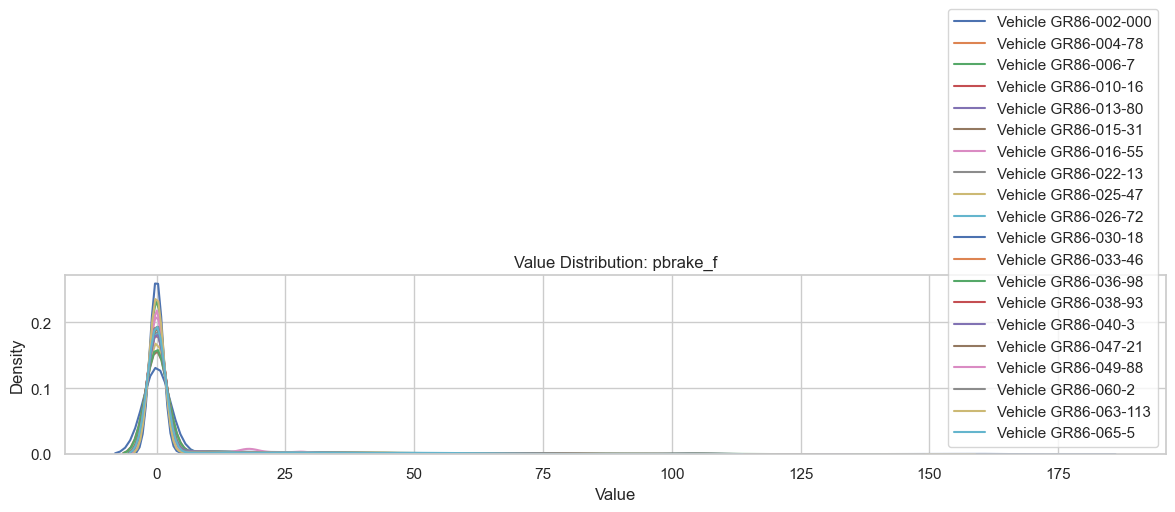

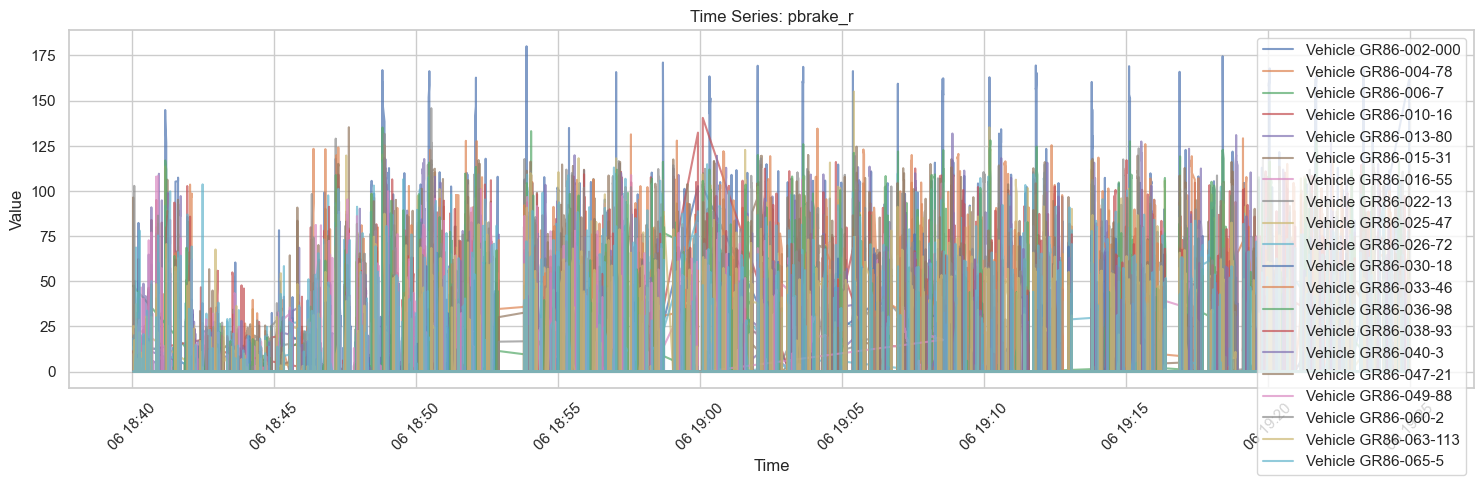

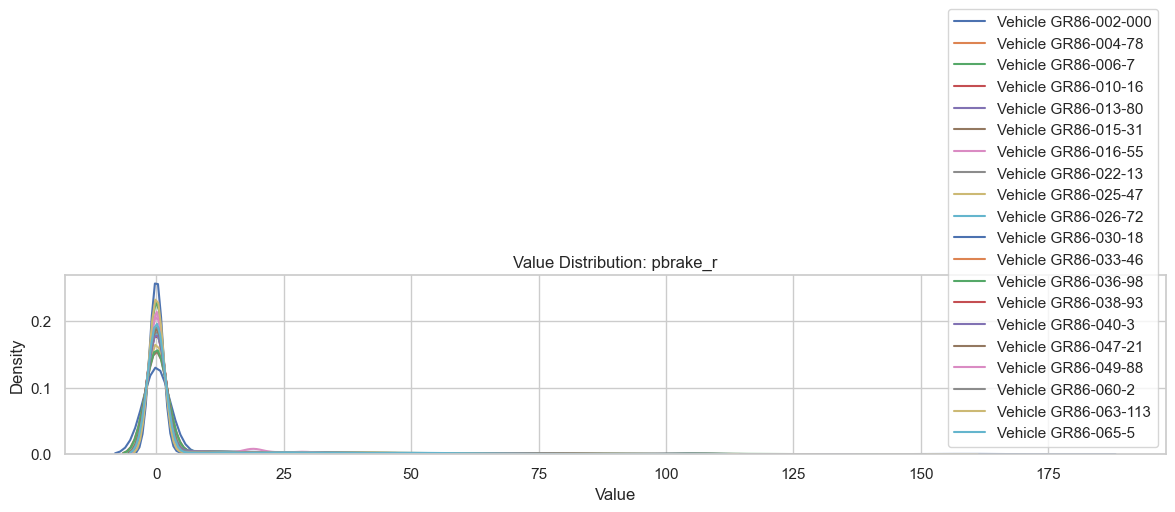

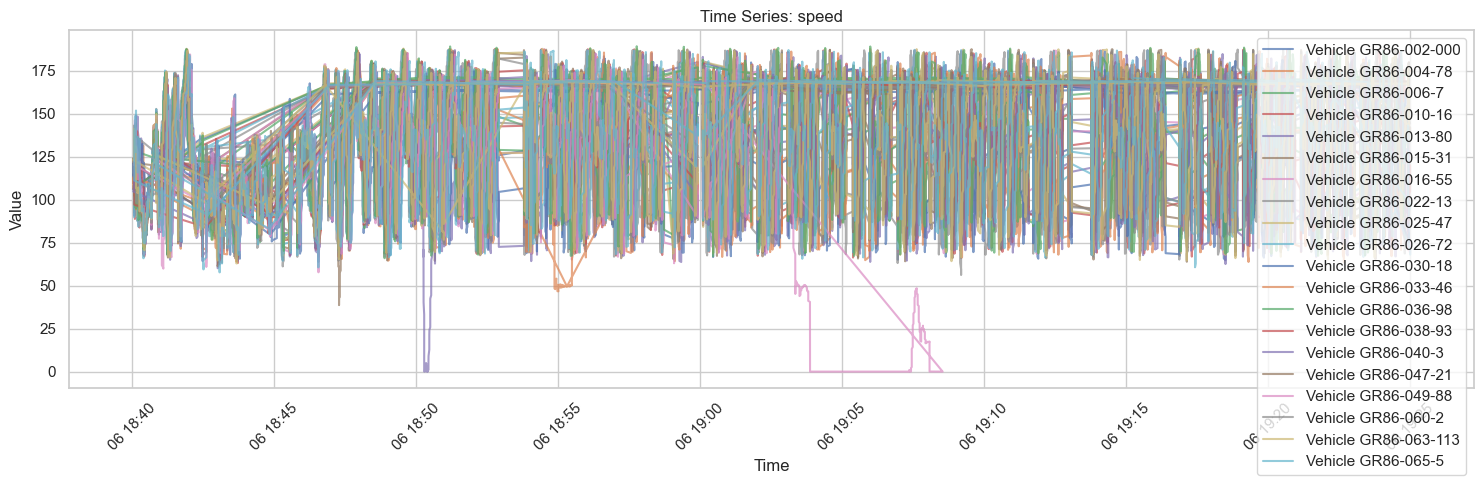

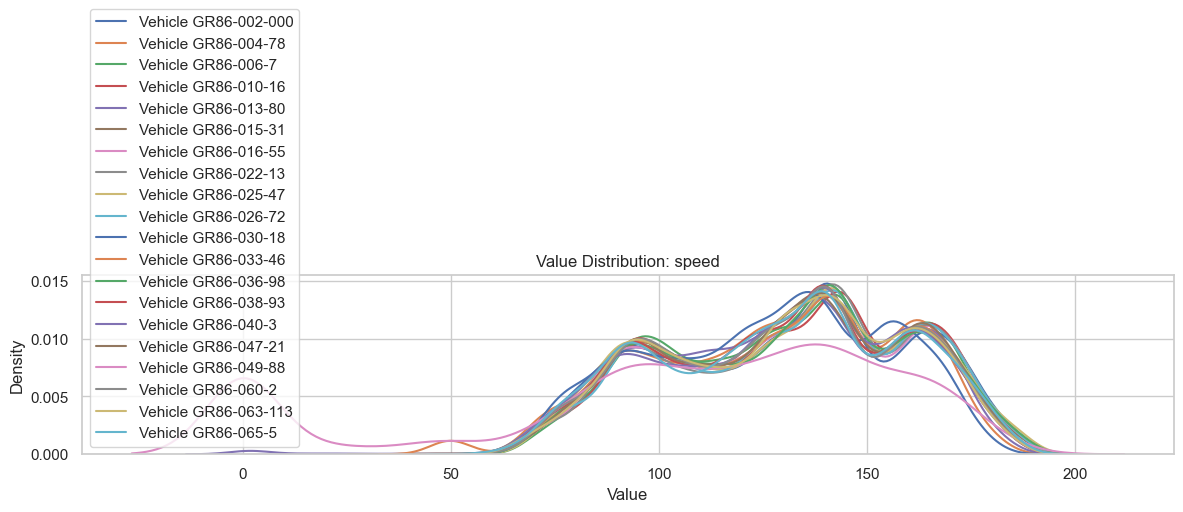


Saved detailed analysis to C:\Users\josek\Desktop\ProyectosPersonales\TGR-C-1\reports\telemetry_eda_report.html


In [8]:
# Load and analyze telemetry data
print('Reading telemetry data...')
df = pd.read_csv(data_file)
print('Data shape:', df.shape)

# Convert meta_time to datetime
df['meta_time'] = pd.to_datetime(df['meta_time'])

# Get unique telemetry names and vehicles
telemetry_names = sorted(df['telemetry_name'].unique())
vehicles = sorted(df['original_vehicle_id'].unique())

print(f'\nFound {len(telemetry_names)} telemetry measurements across {len(vehicles)} vehicles')
print('\nTelemetry measurements:', telemetry_names)
print('\nVehicles:', vehicles)

# Create reports directory
reports_dir = repo_root / 'reports'
reports_dir.mkdir(exist_ok=True)

# Basic statistics per telemetry_name and vehicle
print('\nBasic statistics per telemetry measurement:')
stats_by_telemetry = df.groupby('telemetry_name')['telemetry_value'].describe()
display(stats_by_telemetry)

# Plot time series for each telemetry_name, separated by vehicle
for telemetry_name in telemetry_names:
    telemetry_data = df[df['telemetry_name'] == telemetry_name]
    
    plt.figure(figsize=(15, 5))
    for vehicle in vehicles:
        vehicle_data = telemetry_data[telemetry_data['original_vehicle_id'] == vehicle]
        plt.plot(vehicle_data['meta_time'], vehicle_data['telemetry_value'], 
                label=f'Vehicle {vehicle}', alpha=0.7)
    
    plt.title(f'Time Series: {telemetry_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Distribution plot per vehicle for this telemetry
    plt.figure(figsize=(12, 4))
    for vehicle in vehicles:
        vehicle_data = telemetry_data[telemetry_data['original_vehicle_id'] == vehicle]
        sns.kdeplot(data=vehicle_data['telemetry_value'], label=f'Vehicle {vehicle}')
    
    plt.title(f'Value Distribution: {telemetry_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate HTML report
html_lines = []
html_lines.append('<h1>Telemetry Data Analysis</h1>')

# Add overview
html_lines.append(f'<h2>Overview</h2>')
html_lines.append(f'<p>Analysis of {len(telemetry_names)} telemetry measurements across {len(vehicles)} vehicles.</p>')
html_lines.append('<h3>Telemetry Measurements</h3>')
html_lines.append('<ul>')
for name in telemetry_names:
    html_lines.append(f'<li>{name}</li>')
html_lines.append('</ul>')

# Add statistics tables
html_lines.append('<h2>Statistics by Telemetry Measurement</h2>')
html_lines.append(stats_by_telemetry.to_html())

# Add statistics per vehicle for each telemetry
html_lines.append('<h2>Statistics by Vehicle and Telemetry</h2>')
for telemetry_name in telemetry_names:
    html_lines.append(f'<h3>{telemetry_name}</h3>')
    vehicle_stats = df[df['telemetry_name'] == telemetry_name].groupby('original_vehicle_id')['telemetry_value'].describe()
    html_lines.append(vehicle_stats.to_html())

# Save the report
out_html = reports_dir / 'telemetry_eda_report.html'
out_html.write_text('\n'.join(html_lines), encoding='utf-8')
print(f'\nSaved detailed analysis to {out_html}')

### Analysis Details

The notebook performs the following analysis for each telemetry measurement (telemetry_name):

1. **Time Series Analysis**
   - Plots the telemetry values over time for each vehicle
   - Shows how measurements change during the race
   - Allows comparison between vehicles

2. **Distribution Analysis**
   - Shows the distribution of values for each telemetry measurement
   - Separate distributions per vehicle
   - Helps identify normal operating ranges and outliers

3. **Statistical Summary**
   - Basic statistics (mean, std, min, max, etc.) for each telemetry measurement
   - Broken down by vehicle and measurement type
   - Available in the generated HTML report

The report is saved as `reports/telemetry_eda_report.html` and includes:
- Overview of available telemetry measurements
- Statistical summaries per measurement
- Detailed statistics per vehicle for each measurement type

# EDA